In [ ]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.drop('Name',axis=1,inplace=True)

In [7]:
print(df.shape)
df.head()

(16598, 10)


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df.isna().sum()

Rank              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.Year.mode()

0    2009.0
dtype: float64

In [10]:
df.Year.fillna(2009,inplace=True)

In [11]:
df[['Platform','Rank']].groupby(['Platform'],as_index = False).mean().sort_values(by='Rank').shape

(31, 2)

In [12]:
df[['Publisher','Rank']].groupby(['Publisher'],as_index = False).mean().sort_values(by='Rank').shape

(578, 2)

In [13]:
df[['Genre','Rank']].groupby(['Genre'],as_index = False).mean().sort_values(by='Rank').shape

(12, 2)

In [14]:
print('use dummies?')

use dummies?


In [15]:
df[['Publisher','Rank']].groupby(['Publisher'],as_index = False).mean().sort_values(by='Rank').iloc[:,0].head()

385                 Palcom
424                Red Orb
40     Arena Entertainment
522            UEP Systems
533                  Valve
Name: Publisher, dtype: object

In [16]:
df[['Publisher','Rank']].groupby(['Publisher'],as_index = False).mean().sort_values(by='Rank').iloc[:,1].head()

385     277.0
424     579.0
40      697.0
522     717.0
533    1018.0
Name: Rank, dtype: float64

In [17]:
df[['Publisher','Rank']].groupby(['Publisher'],as_index = False).mean().sort_values(by='Rank').head()

,Publisher,Rank
385,Palcom,277.0
424,Red Orb,579.0
40,Arena Entertainment,697.0
522,UEP Systems,717.0
533,Valve,1018.0


In [18]:
publish_df = df[['Publisher','Rank']].groupby(['Publisher'],as_index = False).mean().sort_values(by='Rank')

In [19]:
publish_df.shape

(578, 2)

In [20]:
publish_df.head()

,Publisher,Rank
385,Palcom,277.0
424,Red Orb,579.0
40,Arena Entertainment,697.0
522,UEP Systems,717.0
533,Valve,1018.0


In [21]:
publish_dict={}
for i in range(len(publish_df)):
    publish_dict[publish_df.iloc[:,0][i]]=float(publish_df.iloc[:,1][i])

In [22]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
df.Publisher.mode()

0    Electronic Arts
dtype: object

In [24]:
df.Publisher.fillna('Electronic Arts',inplace=True)

In [25]:
df.Publisher = df.Publisher.map(lambda x: publish_dict[x])

In [26]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,Sports,3860.830725,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,3860.830725,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,3860.830725,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,3860.830725,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,3860.830725,11.27,8.89,10.22,1.00,31.37


In [27]:
plat_df = pd.get_dummies(df.Platform,drop_first=True)

In [28]:
for col in plat_df.columns:
    df[col] = plat_df[col]

In [29]:
print(df.shape)
df.head()

(16598, 40)


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1,Wii,2006.0,Sports,3860.830725,41.49,29.02,3.77,8.46,82.74,...,0,0,0,0,0,1,0,0,0,0
1,2,NES,1985.0,Platform,3860.830725,29.08,3.58,6.81,0.77,40.24,...,0,0,0,0,0,0,0,0,0,0
2,3,Wii,2008.0,Racing,3860.830725,15.85,12.88,3.79,3.31,35.82,...,0,0,0,0,0,1,0,0,0,0
3,4,Wii,2009.0,Sports,3860.830725,15.75,11.01,3.28,2.96,33.00,...,0,0,0,0,0,1,0,0,0,0
4,5,GB,1996.0,Role-Playing,3860.830725,11.27,8.89,10.22,1.00,31.37,...,0,0,0,0,0,0,0,0,0,0


In [30]:
genre_df = pd.get_dummies(df.Genre,drop_first=True)
for col in genre_df.columns:
    df[col] = genre_df[col]
print(df.shape)
df.head()

(16598, 50)


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,0,2006.0,Sports,3860.830725,41.49,29.02,3.77,8.46,82.74,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1985.0,Platform,3860.830725,29.08,3.58,6.81,0.77,40.24,...,0,0,0,0,0,0,0,0,0,0
2,3,0,2008.0,Racing,3860.830725,15.85,12.88,3.79,3.31,35.82,...,0,0,0,0,1,0,0,0,0,0
3,4,0,2009.0,Sports,3860.830725,15.75,11.01,3.28,2.96,33.00,...,0,0,0,0,0,0,0,0,1,0
4,5,0,1996.0,Role-Playing,3860.830725,11.27,8.89,10.22,1.00,31.37,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df.drop(['Platform','Genre'],axis=1,inplace=True)

In [32]:
print(df.shape)
df.head()

(16598, 48)


,Rank,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,3DO,3DS,...,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,2006.0,3860.830725,41.49,29.02,3.77,8.46,82.74,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1985.0,3860.830725,29.08,3.58,6.81,0.77,40.24,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2008.0,3860.830725,15.85,12.88,3.79,3.31,35.82,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,2009.0,3860.830725,15.75,11.01,3.28,2.96,33.00,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1996.0,3860.830725,11.27,8.89,10.22,1.00,31.37,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
df = df.astype(float)

In [34]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

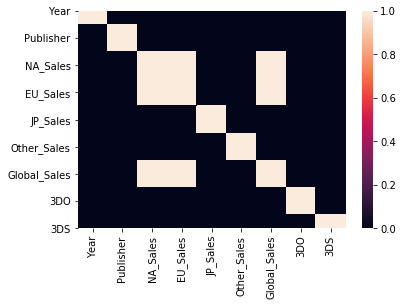

In [35]:
sns.heatmap(df.iloc[:,1:10].corr()>=0.75)

In [36]:
df.drop(['NA_Sales','EU_Sales'],axis=1,inplace=True)

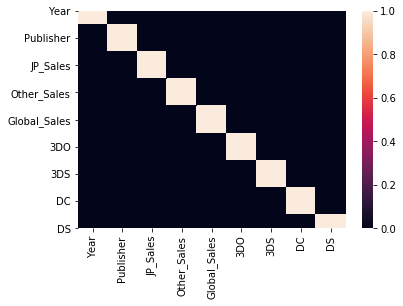

In [37]:
sns.heatmap(df.iloc[:,1:10].corr()>=0.75)

In [38]:
df = df[(np.abs(stats.zscore(df))<=4).all(axis=1)]

In [39]:
df.head()

,Rank,Year,Publisher,JP_Sales,Other_Sales,Global_Sales,3DO,3DS,DC,DS,...,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
125,126.0,2010.0,3860.830725,1.03,0.47,6.59,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,134.0,2009.0,6130.063492,0.06,0.61,6.36,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
134,135.0,2010.0,6349.334140,0.09,0.57,6.34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,139.0,1999.0,6914.977778,0.02,0.33,6.27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,140.0,2010.0,6130.063492,0.03,0.51,6.24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
df.shape

(8607, 46)

In [41]:
mms = MinMaxScaler()

In [42]:
for col in ['Rank','Year','Publisher','JP_Sales','Global_Sales','Other_Sales']:
    if (df[col]>=1).sum()>0:
        df[col] = mms.fit_transform(df[[col]])

In [43]:
df.shape

(8607, 46)

In [44]:
df.head()

,Rank,Year,Publisher,JP_Sales,Other_Sales,Global_Sales,3DO,3DS,DC,DS,...,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
125,0.000000,0.81250,0.199115,0.811024,0.47,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,0.000486,0.78125,0.342838,0.047244,0.61,0.965046,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
134,0.000546,0.81250,0.356725,0.070866,0.57,0.962006,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.000789,0.46875,0.392550,0.015748,0.33,0.951368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.000850,0.81250,0.342838,0.023622,0.51,0.946809,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
for col in ['Year','Publisher','JP_Sales','Other_Sales','Global_Sales']:
    df[col] = list(stats.boxcox(abs(df[col]+0.5)))[0]

In [46]:
X = df.drop('Rank',axis=1)
y = df.Rank

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
## train data

In [50]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_train)
print(f"r^2: {r2_score(y_train, Y_pred)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_train, Y_pred))}")

r^2: 0.9452175437855157
rmse: 0.06643921942415523


In [51]:
feat_mod=sm.OLS(y_train,X_train)
feat_results=feat_mod.fit()
feat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rank   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          2.306e+04
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                        0.00
Time:                        14:21:28   Log-Likelihood:                          7783.7
No. Observations:                6024   AIC:                                 -1.553e+04
Df Residuals:                    6006   BIC:                                 -1.541e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Year             0.0413      0.007      6.031      0.000       0.028       0.055
Publisher        0.0991      0.006     15.876      0.000       0.087       0.111
JP_Sales       1.72e-05    3.3e-06      5.207      0.000    1.07e-05    2.37e-05
Other_Sales      0.0012      0.000     10.359      0.000       0.001       0.001
Global_Sales    -0.0555      0.001   -107.712      0.000      -0.057      -0.054
3DO           3.674e-17   8.81e-18      4.169      0.000    1.95e-17     5.4e-17
3DS           1.479e-17   1.93e-18      7.667      0.000     1.1e-17    1.86e-17
DC            6.692e-17   6.22e-18     10.756      0.000    5.47e-17    7.91e-17
DS              -0.0377      0.005     -7.843      0.000      -0.047      -0.028
GB           -2.364e-17   5.36e-18     -4.408      0.000   -3.41e-17   -1.31e-17
GBA            3.05e-17   2.56e-18     11.913      0.000    2.55e-17    3.55e-17
GC           -1.846e-17   2.81e-18     -6.561      0.000    -2.4e-17   -1.29e-17
GEN           2.525e-17    2.3e-18     10.972      0.000    2.07e-17    2.98e-17
GG             -4.7e-19   5.95e-19     -0.790      0.430   -1.64e-18    6.97e-19
N64           2.181e-18   3.39e-19      6.428      0.000    1.52e-18    2.85e-18
NES           1.542e-18    6.3e-19      2.449      0.014    3.08e-19    2.78e-18
NG             7.76e-19   2.05e-19      3.791      0.000    3.75e-19    1.18e-18
PC            2.338e-19   2.98e-19      0.783      0.434   -3.51e-19    8.19e-19
PCFX                  0          0        nan        nan           0           0
PS              -0.0273      0.004     -6.206      0.000      -0.036      -0.019
PS2             -0.0442      0.004    -11.261      0.000      -0.052      -0.036
PS3             -0.0603      0.005    -11.518      0.000      -0.071      -0.050
PS4                   0          0        nan        nan           0           0
PSP             -0.0327      0.005     -6.525      0.000      -0.042      -0.023
PSV                   0          0        nan        nan           0           0
SAT                   0          0        nan        nan           0           0
SCD                   0          0        nan        nan           0           0
SNES                  0          0        nan        nan           0           0
TG16                  0          0        nan        nan           0           0
WS                    0          0        nan        nan           0           0
Wii             -0.0531      0.005    -10.245      0.000      -0.063      -0.043
WiiU                  0          0        nan        nan           0           0
X360            -0.0477      0.005     -8.804      0.000      -0.058      -0.037
XB                    0          0        nan        nan           0

In [52]:
## Test data

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)
Y_pred = lr.predict(X_test)
print(f"r^2: {r2_score(y_test, Y_pred)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, Y_pred))}")

r^2: 0.944625227193919
rmse: 0.06745086180881872


In [54]:
coef_df = pd.DataFrame(lr.coef_).sort_values(by=0).T
coef_df.columns = X.columns
coef_df

,Year,Publisher,JP_Sales,Other_Sales,Global_Sales,3DO,3DS,DC,DS,GB,...,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,-0.055225,-0.021823,-0.015247,-0.009866,-0.005731,-0.005678,-9.974660e-18,-6.938894e-18,-6.938894e-18,-6.938894e-18,...,0.001153,0.001797,0.002624,0.003569,0.005622,0.009477,0.010865,0.030101,0.042172,0.098241
